# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** LINTANG CAHYANING SUKMA
- **Email:** lintangcahya@student.ub.ac.id
- **ID Dicoding:** lintangcahyaaa

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola perubahan penggunaan Bike Sharing dari bulan ke bulan?
- Pertanyaan 2 : Bagaimana pola penggunaan Bike Sharing berdasarkan cuaca?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hour_df = pd.read_csv('/content/drive/MyDrive/1. Lintang Bangkit/5. Dicoding/Dataset/Bike Sharing/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_df = pd.read_csv('/content/drive/MyDrive/1. Lintang Bangkit/5. Dicoding/Dataset/Bike Sharing/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Mengganti tipe data sesuai dengan keterangan yang ada pada file README.txt

In [11]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['season'] = hour_df['season'].astype('category')
hour_df['mnth'] = hour_df['mnth'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [13]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df['season'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

Mereplace atau mengonversikan nilai pada tipe data category sesuai dengan rincian yang ada di file README.txt

In [15]:
hour_df.season.replace({1:'Springer', 2:'Summer', 3:'Fall', 4:'Winter'}, inplace=True)
day_df.season.replace({1:'Springer', 2:'Summer', 3:'Fall', 4:'Winter'}, inplace=True)

hour_df.mnth.replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Augst', 9:'Sept', 10:'Okt', 11:'Nov', 12:'Dec'}, inplace=True)
day_df.mnth.replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Augst', 9:'Sept', 10:'Okt', 11:'Nov', 12:'Dec'}, inplace=True)

hour_df.yr.replace({0:2011, 1:2012}, inplace=True)
day_df.yr.replace({0:2011, 1:2012}, inplace=True)

hour_df.weekday.replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}, inplace=True)
day_df.weekday.replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}, inplace=True)

hour_df.workingday.replace({0:'No', 1:'Yes'}, inplace=True)
day_df.workingday.replace({0:'No', 1:'Yes'}, inplace=True)

hour_df.holiday.replace({0:'No', 1:'Yes'}, inplace=True)
day_df.holiday.replace({0:'No', 1:'Yes'}, inplace=True)

hour_df.weathersit.replace({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'}, inplace=True)
day_df.weathersit.replace({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'}, inplace=True)

In [16]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,Jan,0,No,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,Jan,2,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,Jan,3,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,Jan,4,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,Jan,No,Sat,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,Jan,No,Sun,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,Jan,No,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,Jan,No,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,Jan,No,Wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengembalikan ke nilai yang sebelumnya

In [18]:
hour_df['temp'] = hour_df['temp'] / 41.0
hour_df['atemp'] = hour_df['atemp'] / 50.0
hour_df['hum'] = hour_df['hum'] / 100.0
hour_df['windspeed'] = hour_df['windspeed'] / 67.0


day_df['temp'] = day_df['temp'] / 41.0
day_df['atemp'] = day_df['atemp'] / 50.0
day_df['hum'] = day_df['hum'] / 100.0
day_df['windspeed'] = day_df['windspeed'] / 67.0

In [19]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,Jan,0,No,Sat,No,Clear,0.005854,0.005758,0.0081,0.0,3,13,16
1,2,2011-01-01,Springer,2011,Jan,1,No,Sat,No,Clear,0.005366,0.005454,0.0080,0.0,8,32,40
2,3,2011-01-01,Springer,2011,Jan,2,No,Sat,No,Clear,0.005366,0.005454,0.0080,0.0,5,27,32
3,4,2011-01-01,Springer,2011,Jan,3,No,Sat,No,Clear,0.005854,0.005758,0.0075,0.0,3,10,13
4,5,2011-01-01,Springer,2011,Jan,4,No,Sat,No,Clear,0.005854,0.005758,0.0075,0.0,0,1,1


In [20]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,Jan,No,Sat,No,Mist,0.008394,0.007272,0.008058,0.002395,331,654,985
1,2,2011-01-02,Springer,2011,Jan,No,Sun,No,Mist,0.008865,0.007075,0.006961,0.003710,131,670,801
2,3,2011-01-03,Springer,2011,Jan,No,Mon,Yes,Clear,0.004789,0.003788,0.004373,0.003706,120,1229,1349
3,4,2011-01-04,Springer,2011,Jan,No,Tue,Yes,Clear,0.004878,0.004242,0.005904,0.002392,108,1454,1562
4,5,2011-01-05,Springer,2011,Jan,No,Wed,Yes,Clear,0.005536,0.004585,0.004370,0.002790,82,1518,1600


Merename atau mengganti nama-nama kolom agar lebih mudah dipahami

In [21]:
hour_df.rename(columns={'dteday': 'date'}, inplace=True)
hour_df.rename(columns={'mnth': 'month'}, inplace=True)
hour_df.rename(columns={'yr': 'year'}, inplace=True)
hour_df.rename(columns={'weathersit': 'weather'}, inplace=True)
hour_df.rename(columns={'temp': 'temperatur'}, inplace=True)
hour_df.rename(columns={'hum': 'humidity'}, inplace=True)
hour_df.rename(columns={'cnt': 'count'}, inplace=True)

day_df.rename(columns={'dteday': 'date'}, inplace=True)
day_df.rename(columns={'mnth': 'month'}, inplace=True)
day_df.rename(columns={'yr': 'year'}, inplace=True)
day_df.rename(columns={'weathersit': 'weather'}, inplace=True)
day_df.rename(columns={'temp': 'temperatur'}, inplace=True)
day_df.rename(columns={'hum': 'humidity'}, inplace=True)
day_df.rename(columns={'cnt': 'count'}, inplace=True)

In [22]:
hour_df.head()

,instant,date,season,year,month,hr,holiday,weekday,workingday,weather,temperatur,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,Jan,0,No,Sat,No,Clear,0.005854,0.005758,0.0081,0.0,3,13,16
1,2,2011-01-01,Springer,2011,Jan,1,No,Sat,No,Clear,0.005366,0.005454,0.0080,0.0,8,32,40
2,3,2011-01-01,Springer,2011,Jan,2,No,Sat,No,Clear,0.005366,0.005454,0.0080,0.0,5,27,32
3,4,2011-01-01,Springer,2011,Jan,3,No,Sat,No,Clear,0.005854,0.005758,0.0075,0.0,3,10,13
4,5,2011-01-01,Springer,2011,Jan,4,No,Sat,No,Clear,0.005854,0.005758,0.0075,0.0,0,1,1


In [23]:
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperatur,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,Jan,No,Sat,No,Mist,0.008394,0.007272,0.008058,0.002395,331,654,985
1,2,2011-01-02,Springer,2011,Jan,No,Sun,No,Mist,0.008865,0.007075,0.006961,0.003710,131,670,801
2,3,2011-01-03,Springer,2011,Jan,No,Mon,Yes,Clear,0.004789,0.003788,0.004373,0.003706,120,1229,1349
3,4,2011-01-04,Springer,2011,Jan,No,Tue,Yes,Clear,0.004878,0.004242,0.005904,0.002392,108,1454,1562
4,5,2011-01-05,Springer,2011,Jan,No,Wed,Yes,Clear,0.005536,0.004585,0.004370,0.002790,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
day_df.describe(include="all")

<ipython-input-24-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,date,season,year,month,holiday,weekday,workingday,weather,temperatur,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,Jan,No,Sun,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,0.012083,0.009487,0.006279,0.002843,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,NaN,NaN,NaN,NaN,0.004465,0.003259,0.001424,0.001157,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.001442,0.001581,0.000000,0.000334,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.008222,0.006757,0.005200,0.002014,315.500000,2497.000000,3152.000000


Melihat korelasi matriks yang ada pada day dataset

In [25]:
correlation = day_df.corr()

<ipython-input-25-28d8420dfdeb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = day_df.corr()


In [26]:
print("Matriks Korelasi:")
print(correlation)

Matriks Korelasi:
             instant      year  temperatur     atemp  humidity  windspeed  \
instant     1.000000  0.866025    0.150580  0.152638  0.016375  -0.112620   
year        0.866025  1.000000    0.047604  0.046106 -0.110651  -0.011817   
temperatur  0.150580  0.047604    1.000000  0.991702  0.126963  -0.157944   
atemp       0.152638  0.046106    0.991702  1.000000  0.139988  -0.183643   
humidity    0.016375 -0.110651    0.126963  0.139988  1.000000  -0.248489   
windspeed  -0.112620 -0.011817   -0.157944 -0.183643 -0.248489   1.000000   
casual      0.275255  0.248546    0.543285  0.543864 -0.077008  -0.167613   
registered  0.659623  0.594248    0.540012  0.544192 -0.091089  -0.217449   
count       0.628830  0.566710    0.627494  0.631066 -0.100659  -0.234545   

              casual  registered     count  
instant     0.275255    0.659623  0.628830  
year        0.248546    0.594248  0.566710  
temperatur  0.543285    0.540012  0.627494  
atemp       0.543864    0.54419

Eksplorasi berdasarkan jumlah peminjaman dalam 2 tahun yaitu 2011 dan 2012

In [27]:
day_df.groupby(by='year')['count'].agg(['sum', 'mean', 'median', 'std'])

,sum,mean,median,std
year,,,,
2011,1243103,3405.761644,3740.0,1378.753666
2012,2049576,5599.934426,5927.0,1788.667868


Eksplorasi berdasarkan jumlah peminjaman dalam 12 bulan

In [28]:
day_df.groupby(by='month')['count'].agg(['sum', 'mean', 'median', 'std'])

,sum,mean,median,std
month,,,,
Jan,134933,2176.338710,1939.0,1161.674370
Feb,151352,2655.298246,2402.0,1145.313307
Mar,228920,3692.258065,3216.5,1899.301812
Apr,269094,4484.900000,4293.5,1776.160778
May,331686,5349.774194,4890.5,1298.711561
Jun,346342,5772.366667,5308.5,1240.400031
Jul,344948,5563.677419,5446.5,1273.751871
Augst,351194,5664.419355,5229.5,1494.516146
Sept,345991,5766.516667,5384.0,1810.130649


Ekplorasi berdasarkan musim

In [29]:
day_df.groupby(by='season')['count'].agg(['sum', 'mean', 'median', 'std'])

,sum,mean,median,std
season,,,,
Springer,471348,2604.132597,2209.0,1399.942119
Summer,918589,4992.331522,4941.5,1695.977235
Fall,1061129,5644.303191,5353.5,1459.800381
Winter,841613,4728.162921,4634.5,1699.615261


Eksplorasi berdasarkan cuaca

In [30]:
day_df.groupby(by='weather')['count'].agg(['sum', 'mean', 'median', 'std'])

,sum,mean,median,std
weather,,,,
Clear,2257952,4876.786177,4844.0,1879.483989
Mist,996858,4035.862348,4040.0,1809.109918
Light Snow,37869,1803.285714,1817.0,1240.284449


## Visualization & Explanatory Analysis

### Pertanyaan 1:

# 1. Bagaimana pola perubahan penggunaan Bike Sharing dari bulan ke bulan?

In [31]:
monthly_usage = day_df.groupby('month')['count'].sum().reset_index()

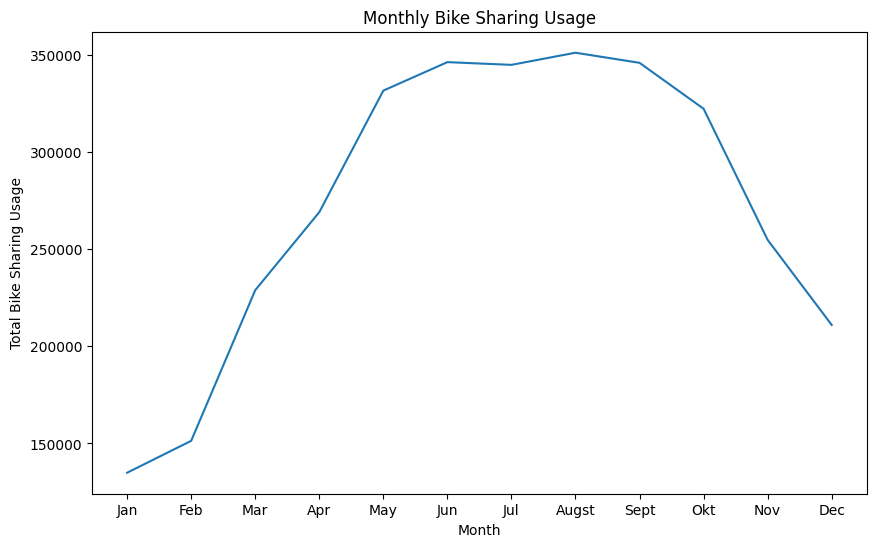

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_usage['month'], monthly_usage['count'])
ax.set_xlabel('Month')
ax.set_ylabel('Total Bike Sharing Usage')
ax.set_title('Monthly Bike Sharing Usage')
plt.show()

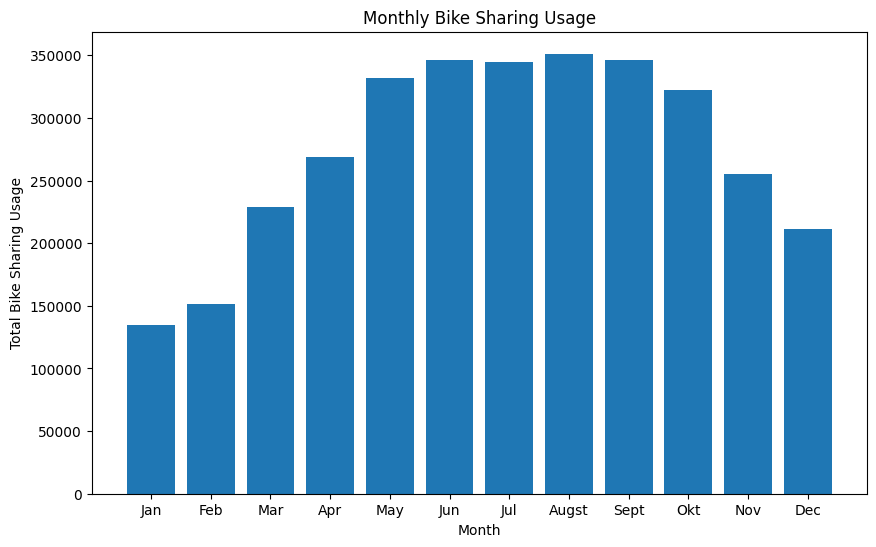

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(monthly_usage['month'], monthly_usage['count'])
ax.set_xlabel('Month')
ax.set_ylabel('Total Bike Sharing Usage')
ax.set_title('Monthly Bike Sharing Usage')
plt.show()

Plot di atas menunjukkan pola penggunaan bike sharing dari bulan ke bulan dalam satu tahun. Sumbu X menunjukkan bulan, dan sumbu Y menunjukkan jumlah total penggunaan bike sharing.


*   Hasil Analisis

Penggunaan Bike Sharing lebih tinggi pada bulan Juni-Agustus dengan total penggunaan sekitar 350.000, yang dimana pada bulan tersebut merupakan bulan-bulan musim panas(summer) dan penggunaan lebih rendah pada bulan Desember-Februari yang dimana merupakan bulan dengan musim dingin(winter). Hal tersebut menunjukkan bahwa pola perubahan penggunaan dari Bike sharing ini tergantung pada musim.




### Pertanyaan 2:

# 2. Bagaimana pola penggunaan Bike Sharing berdasarkan cuaca?

In [34]:
avg_usage_by_weather = day_df.groupby('weather')['count'].mean().reset_index()

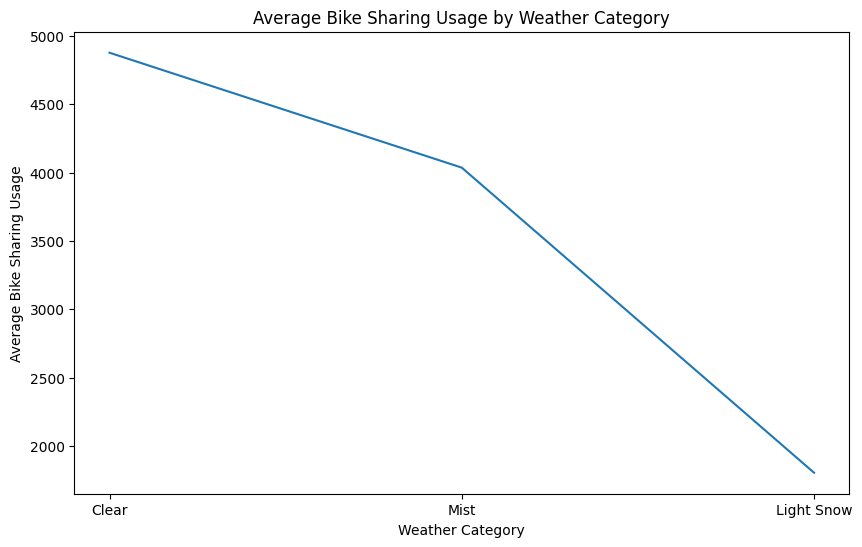

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(avg_usage_by_weather['weather'], avg_usage_by_weather['count'])
ax.set_xlabel('Weather Category')
ax.set_ylabel('Average Bike Sharing Usage')
ax.set_title('Average Bike Sharing Usage by Weather Category')
plt.show()

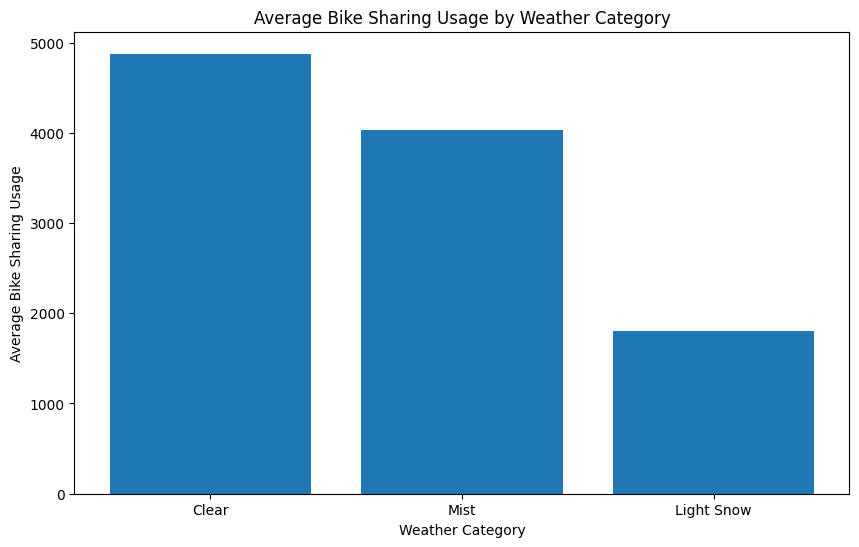

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(avg_usage_by_weather['weather'], avg_usage_by_weather['count'])
ax.set_xlabel('Weather Category')
ax.set_ylabel('Average Bike Sharing Usage')
ax.set_title('Average Bike Sharing Usage by Weather Category')
plt.show()

Plot di atas menunjukkan pola penggunaan bike sharing berdasarkan 4 kategori cuaca: Clear, Mist, Light Snow, dan Heavy Rain. namun pada plot tidak terdapat hasil untuk Heavy Rain, karena data yang digunakan tidak terdapat kategori Heavy Rain. Sumbu X menunjukkan kategori cuaca, dan sumbu Y menunjukkan total penggunaan bike sharing.


*   Hasil Analisis
1. Penggunaan Bike Sharing paling tinggi yaitu ada pada saat cuaca cerah (Clear).
2. Penggunaan Bike Sharing menurun saat cuaca kabut (Mist).
3. Penggunaan Bike Sharing kembali menurun pada saat cuaca sedikit salju (Light Snow).
4. Tidak terdapat penggunaan Bike Sharing pada saat cuaca hujan lebat (Heavy Rain).



## Conclusion

- Conclution pertanyaan 1:
Pola penggunaan Bike Sharing menunjukkan pola musiman yang jelas. Penggunaan Bike Sharing lebih tinggi di bulan-bulan musim panas ketika cuaca lebih hangat dan orang-orang lebih cenderung beraktivitas di luar ruangan. Penggunaan Bike Sharing menurun di bulan-bulan musim dingin ketika cuaca lebih dingin dan orang-orang lebih cenderung beraktivitas di dalam ruangan.

- Conclution pertanyaan 2:
Cuaca memiliki pengaruh yang besar terhadap pola penggunaan Bike Sharing. Orang-orang lebih cenderung menggunakan Bike Sharing saat cuaca cerah dan tidak terlalu terpengaruh oleh kabut. Penggunaan bike sharing turun drastis saat cuaca hujan, baik hujan salju ringan maupun hujan deras.
